<a href="https://colab.research.google.com/github/brokentwigs/Colab-Analysis/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time

# visualizatoin
import matplotlib.pyplot as plt
import seaborn as sns

# data wrangling
import pandas as pd
import numpy as np

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# description
description = pd.read_csv('WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('training_v2.csv')

#print_full(description)
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

In [ ]:
df.shape

(91713, 186)

In [ ]:
# count values in hospital death column
print(df['hospital_death'].value_counts())

0    83798
1     7915
Name: hospital_death, dtype: int64


In [ ]:
# count number of males and females
print(df.gender.value_counts())

M    49469
F    42219
Name: gender, dtype: int64


In [ ]:
# Total number of NaNs
df.isnull().sum().sum()

5743492

In [ ]:
df.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  91713.000000      91713.000000  ...                   83766.000000   
mean     508.357692          0.835766  ...                       0.086787   
std      228.989661          2.487756  ...                       0.247569   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              83766.000000  90998.000000  90998.000000   
mean                   0.043955      0.000857      0.015693   
std                    0.217341      0.029265      0.124284   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       90998.000000     90998.000000       90998.000000  90998.000000   
mean            0.225192         0.012989           0.026165      0.007066   
std             0.417711         0.113229           0.159628      0.083763   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  90998.000000                 90998.000000  
mean       0.004132                     0.020638  
std        0.064148                     0.142169  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [ ]:
# All categories
description.Category.value_counts()

labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: Category, dtype: int64

In [ ]:
# Returns category description

def category(description, string):

    return description[description.Category==string]

In [ ]:
# GOSSIS example prediction
r = category(description, 'GOSSIS example prediction')
if 'GOSSIS example prediction' not in df:
    print('Dictionary contains more variables than dataset')

Dictionary contains more variables than dataset


In [ ]:
# APACHE grouping
r = category(description, 'APACHE grouping')
df2 = df[['apache_3j_bodysystem', 'apache_2_bodysystem']]
# Chech how many values are not the same between the two columns
df2[~df2['apache_3j_bodysystem'].isin(df2['apache_2_bodysystem'])]

apache_3j_bodysystem apache_2_bodysystem
0                   Sepsis      Cardiovascular
5             Neurological          Neurologic
7                   Sepsis      Cardiovascular
11            Neurological          Neurologic
12            Neurological          Neurologic
...                    ...                 ...
91696               Sepsis      Cardiovascular
91697               Sepsis      Cardiovascular
91703               Sepsis      Cardiovascular
91708               Sepsis      Cardiovascular
91709               Sepsis      Cardiovascular

[27925 rows x 2 columns]

27925 rows are not the same between the two columns. while 63788 rows are the same. As the amount of rows that are similar is so much larger, and to avoid any possible correlations, we will drop apache_2_bodysystem

<Axes: >

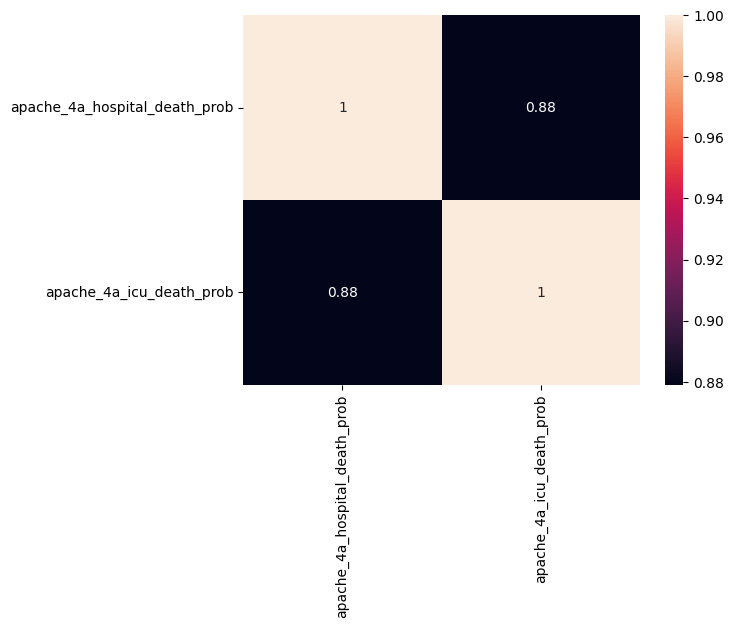

In [ ]:
# APACHE prediction
r = category(description, 'APACHE prediction')
sns.heatmap(df[["apache_4a_hospital_death_prob","apache_4a_icu_death_prob"]].corr(),annot=True)

As you can see, highly correlated with each other. As the target variable is hospital death; we prefer to keep the apache_4a_hospital_death_prob.

In [ ]:
# Identifiers
r = category(description, 'identifier')
df.encounter_id.nunique(), df.hospital_id.nunique(), df.patient_id.nunique()

(91713, 147, 91713)

Usually we delete id columns as they give no additional information and could cause over-fitting. With encounter_id and patient_id this is certainly the case, as there are as many id's as there are rows in the dataset. The hospital_id is different however, it just has 147 unique values. Thus, we keep it

In [ ]:
# APACHE comorbidity
r = category(description, 'APACHE comorbidity')

In [ ]:
for i in r["Variable Name"].values:
    df[i] = df[i].fillna(0)

Binary columns, so any missing values are replaced with a 0

In [ ]:
# Demographic
r = category(description, 'demographic')
r

Category          Variable Name     Unit of Measure Data Type  \
3   demographic         hospital_death                None    binary   
4   demographic                    age               Years   numeric   
5   demographic                    bmi  kilograms/metres^2    string   
6   demographic       elective_surgery                None    binary   
7   demographic              ethnicity                None    string   
8   demographic                 gender                None    string   
9   demographic                 height         centimetres   numeric   
10  demographic  hospital_admit_source                None    string   
11  demographic       icu_admit_source                None    string   
12  demographic         icu_admit_type                None    string   
13  demographic                 icu_id                None   integer   
14  demographic          icu_stay_type                None    string   
15  demographic               icu_type                None    string   
16  demographic       pre_icu_los_days                Days   numeric   
17  demographic     readmission_status                None    binary   
18  demographic                 weight           kilograms   numeric   

                                          Description           Example  
3   Whether the patient died during this hospitali...                 0  
4            The age of the patient on unit admission              None  
5   The body mass index of the person on unit admi...              21.5  
6   Whether the patient was admitted to the hospit...                 0  
7   The common national or cultural tradition whic...         Caucasian  
8                  The genotypical sex of the patient                 F  
9          The height of the person on unit admission               180  
10  The location of the patient prior to being adm...              Home  
11  The location of the patient prior to being adm...    Operating room  
12         The type of unit admission for the patient    Cardiothoracic  
13  A unique identifier for the unit to which the ...              None  
14                                                NaN              None  
15  A classification which indicates the type of c...  Neurological ICU  
16  The length of stay of the patient between hosp...               3.5  
17  Whether the current unit stay is the second (o...                 0  
18  The weight (body mass) of the person on unit a...                80

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64
Axes(0.125,0.11;0.775x0.77)


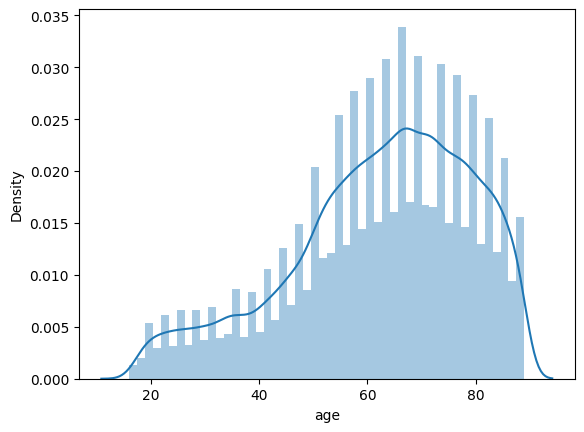

In [ ]:
# Hospital death is very unbalanced
print(df.hospital_death.value_counts(normalize=True))

# Age distribution
print(sns.distplot(df["age"]))

<Axes: xlabel='bmi', ylabel='Density'>

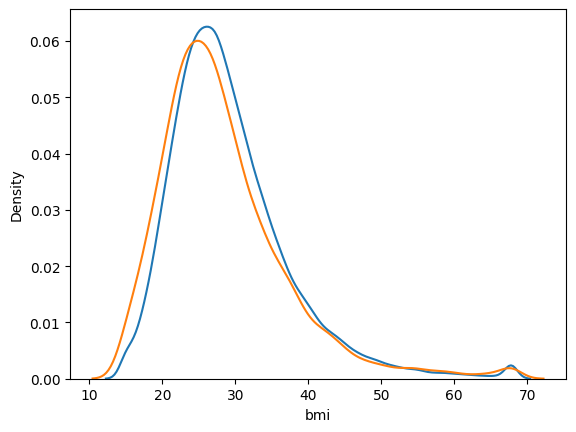

In [ ]:
# Effect of BMI on hospital death
sns.distplot(df[df["hospital_death"]==0]["bmi"],hist=False)
sns.distplot(df[df["hospital_death"]==1]["bmi"],hist=False)

As weight and height are associated with bmi, we keep bmi and drop weight and height

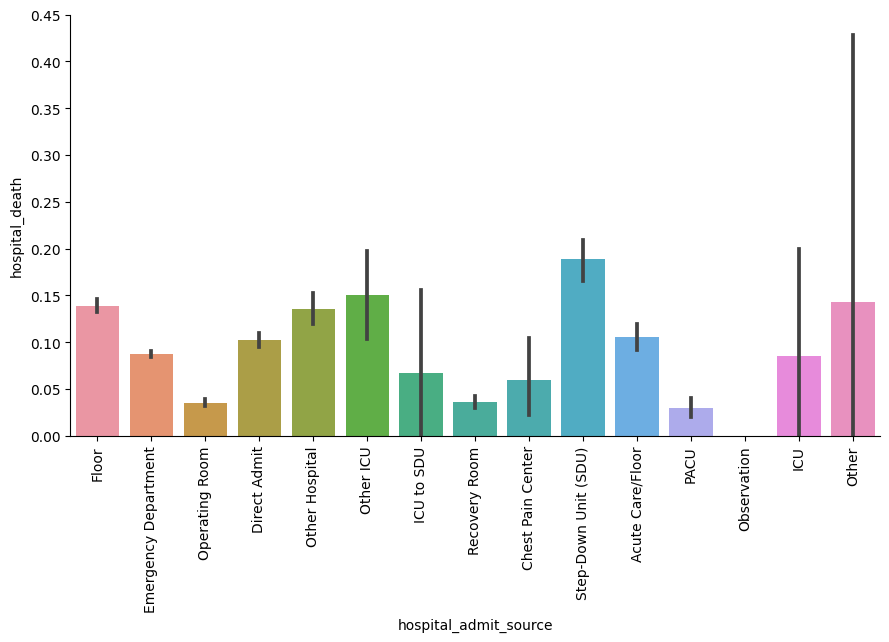

In [ ]:
# Effect of hospital admit source on hospital death
sns.catplot(x="hospital_admit_source",y="hospital_death",kind="bar",data=df,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

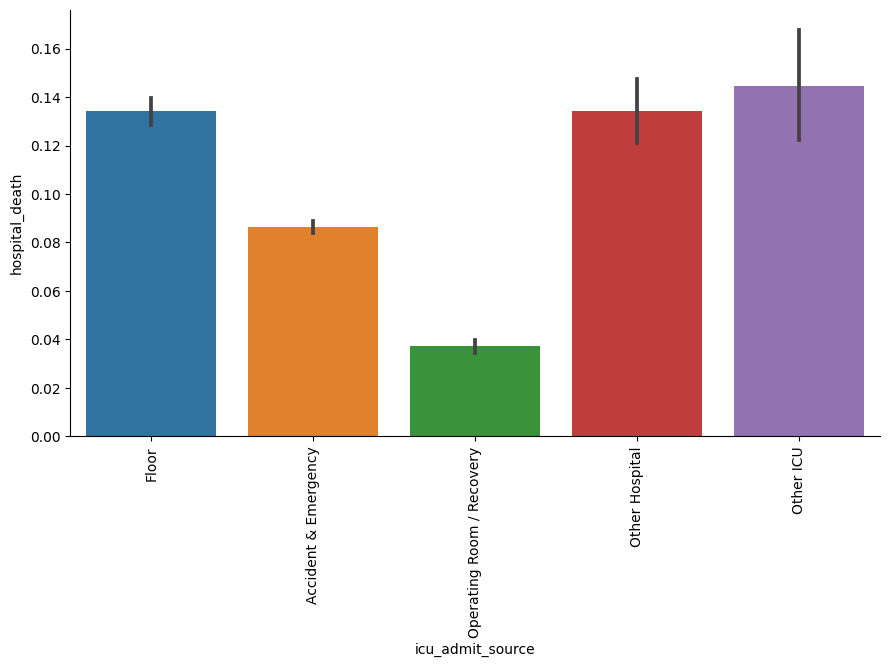

In [ ]:
# Effect of icu admit source on hospital death
sns.catplot(x="icu_admit_source",y="hospital_death",kind="bar",data=df,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
if 'icu_admit_type' not in df:
    print('Dictionary contains more variables than dataset')

Dictionary contains more variables than dataset


In [ ]:
# Check to see whether icu_id has unique values for every row or not
df.icu_id.nunique()

241

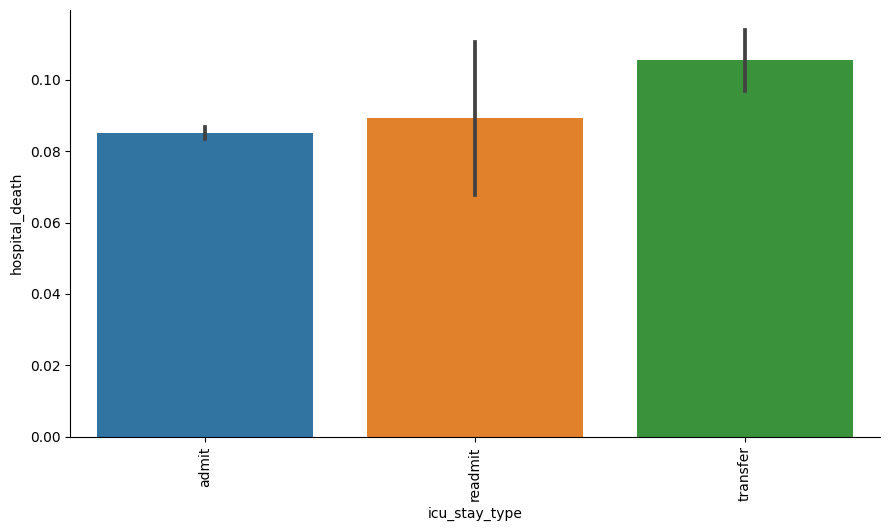

In [ ]:
# Effect of icu stay type on hospital death
sns.catplot(x="icu_stay_type",y="hospital_death",kind="bar",data=df,aspect=1.8)
plt.xticks(rotation=90)
plt.show()

Practically no variation, so we can drop icu_stay_type

<Axes: >

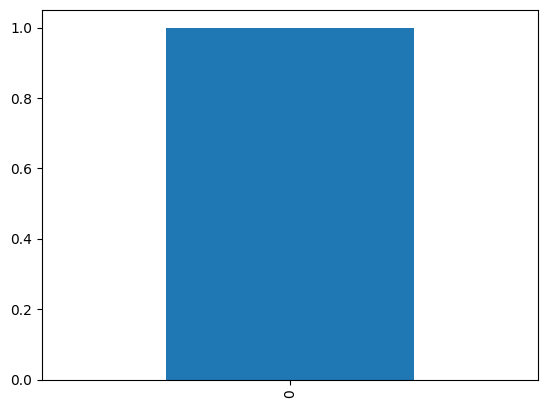

In [ ]:
# To show that readmission_status only contains 0's (thus we drop it)
df["readmission_status"].value_counts(normalize=True).plot(kind='bar')

In [ ]:
# Fully prints out the description
for i in r.Description.values:
    print(i)

Whether the patient died during this hospitalization
The age of the patient on unit admission
The body mass index of the person on unit admission
Whether the patient was admitted to the hospital for an elective surgical operation
The common national or cultural tradition which the person belongs to
The genotypical sex of the patient
The height of the person on unit admission
The location of the patient prior to being admitted to the hospital
The location of the patient prior to being admitted to the unit
The type of unit admission for the patient
A unique identifier for the unit to which the patient was admitted
nan
A classification which indicates the type of care the unit is capable of providing
The length of stay of the patient between hospital admission and unit admission
Whether the current unit stay is the second (or greater) stay at an ICU within the same hospitalization
The weight (body mass) of the person on unit admission


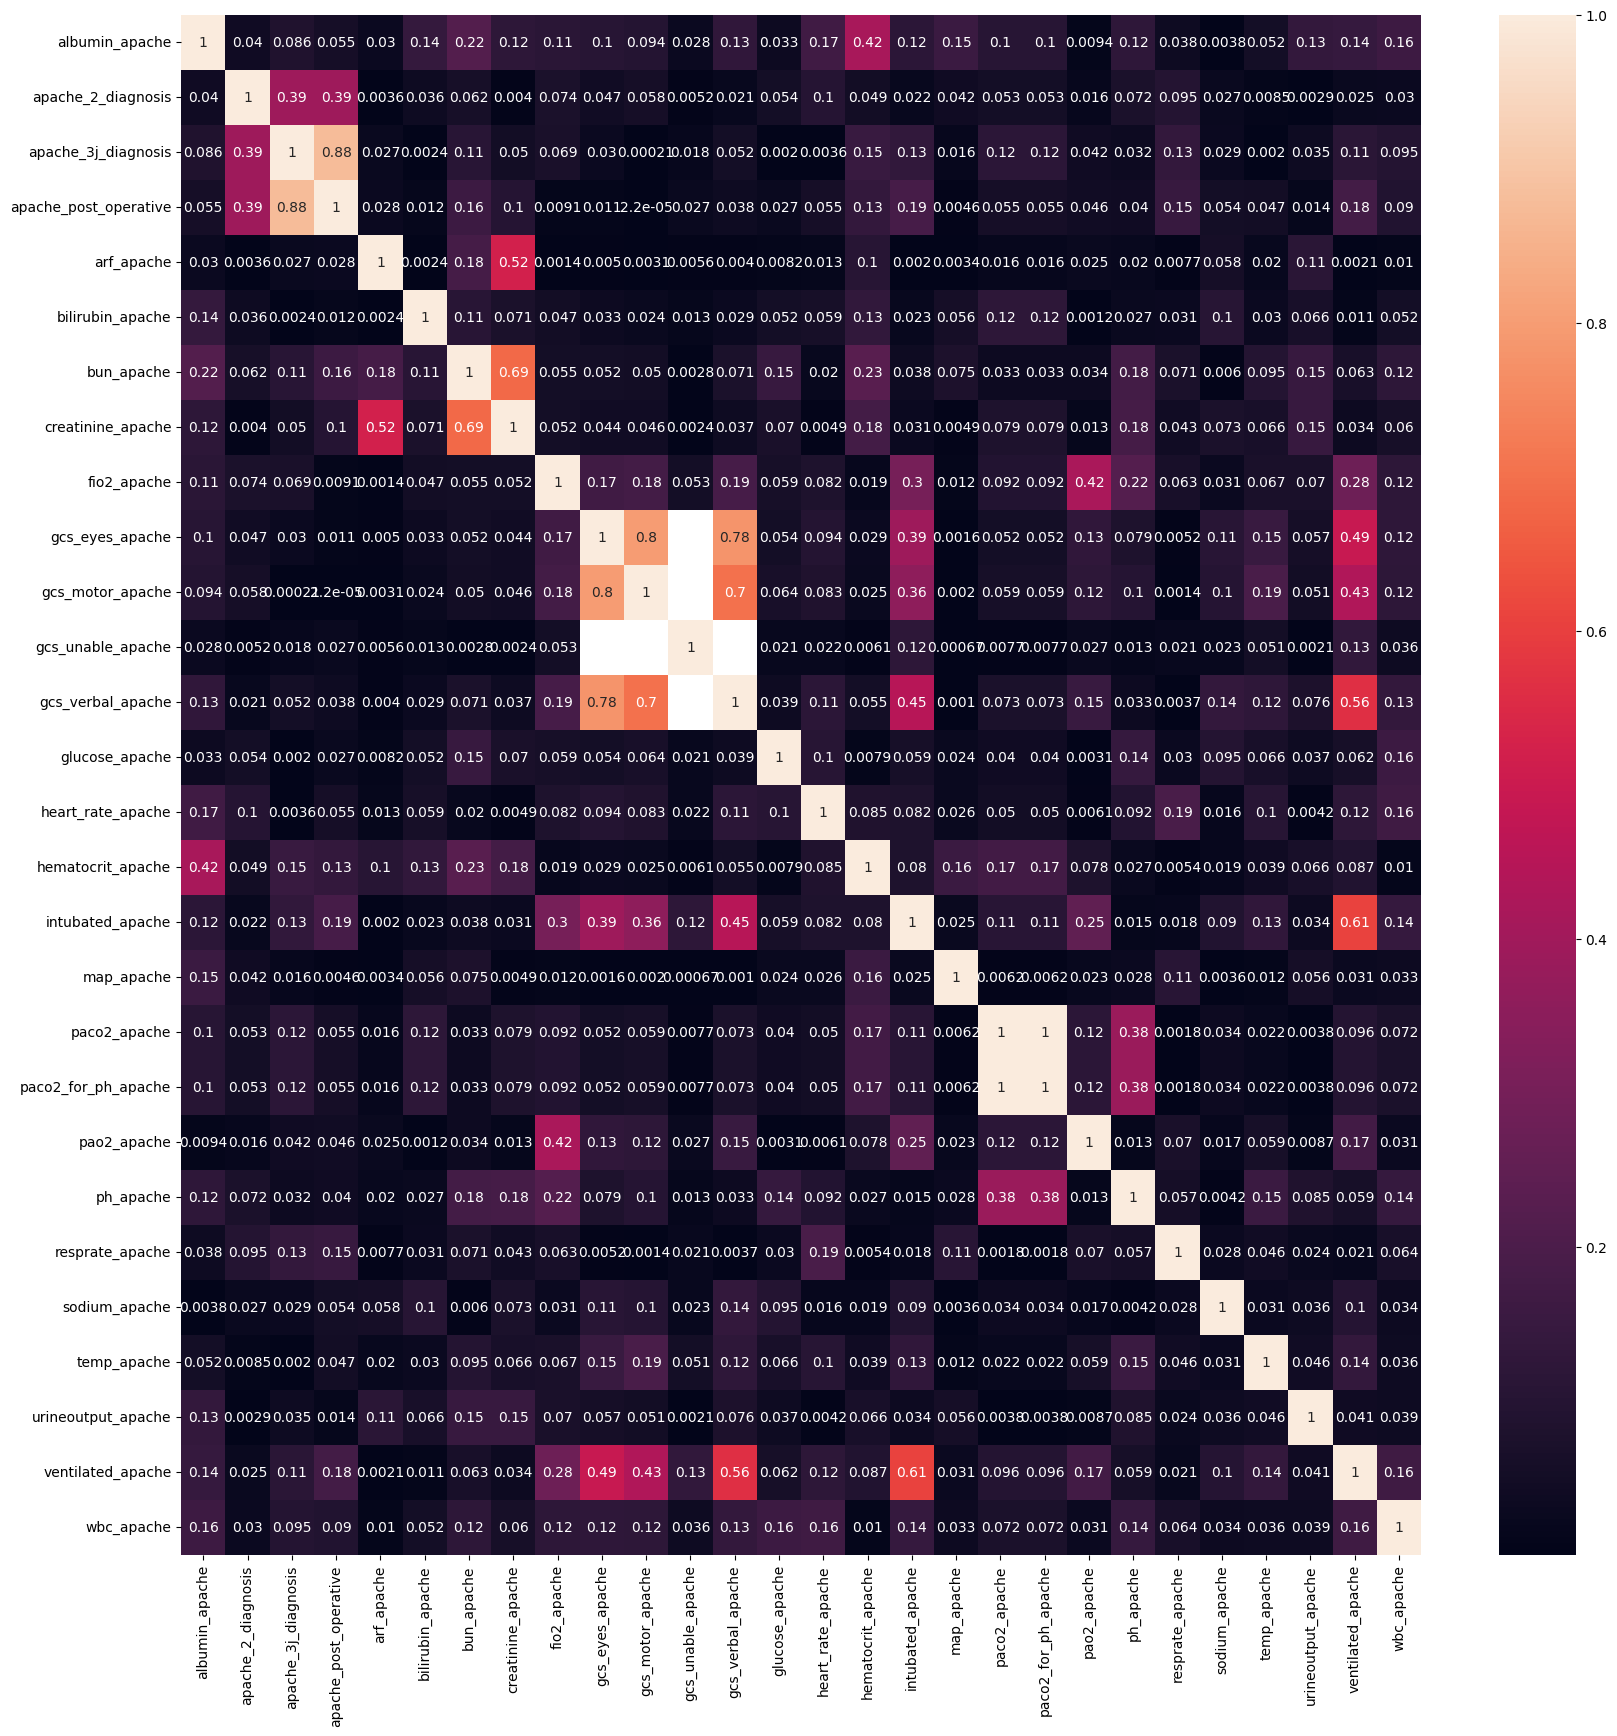

In [ ]:
# APACHE covariate
apache_cov = category(description,"APACHE covariate")
plt.figure(figsize=(20,20))
sns.heatmap(abs(df[apache_cov["Variable Name"]].corr()),annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features_apache_cov = correlation(df[apache_cov["Variable Name"]], 0.85)
print(len(set(corr_features_apache_cov)))
print(corr_features_apache_cov)

2
{'apache_post_operative', 'paco2_for_ph_apache'}


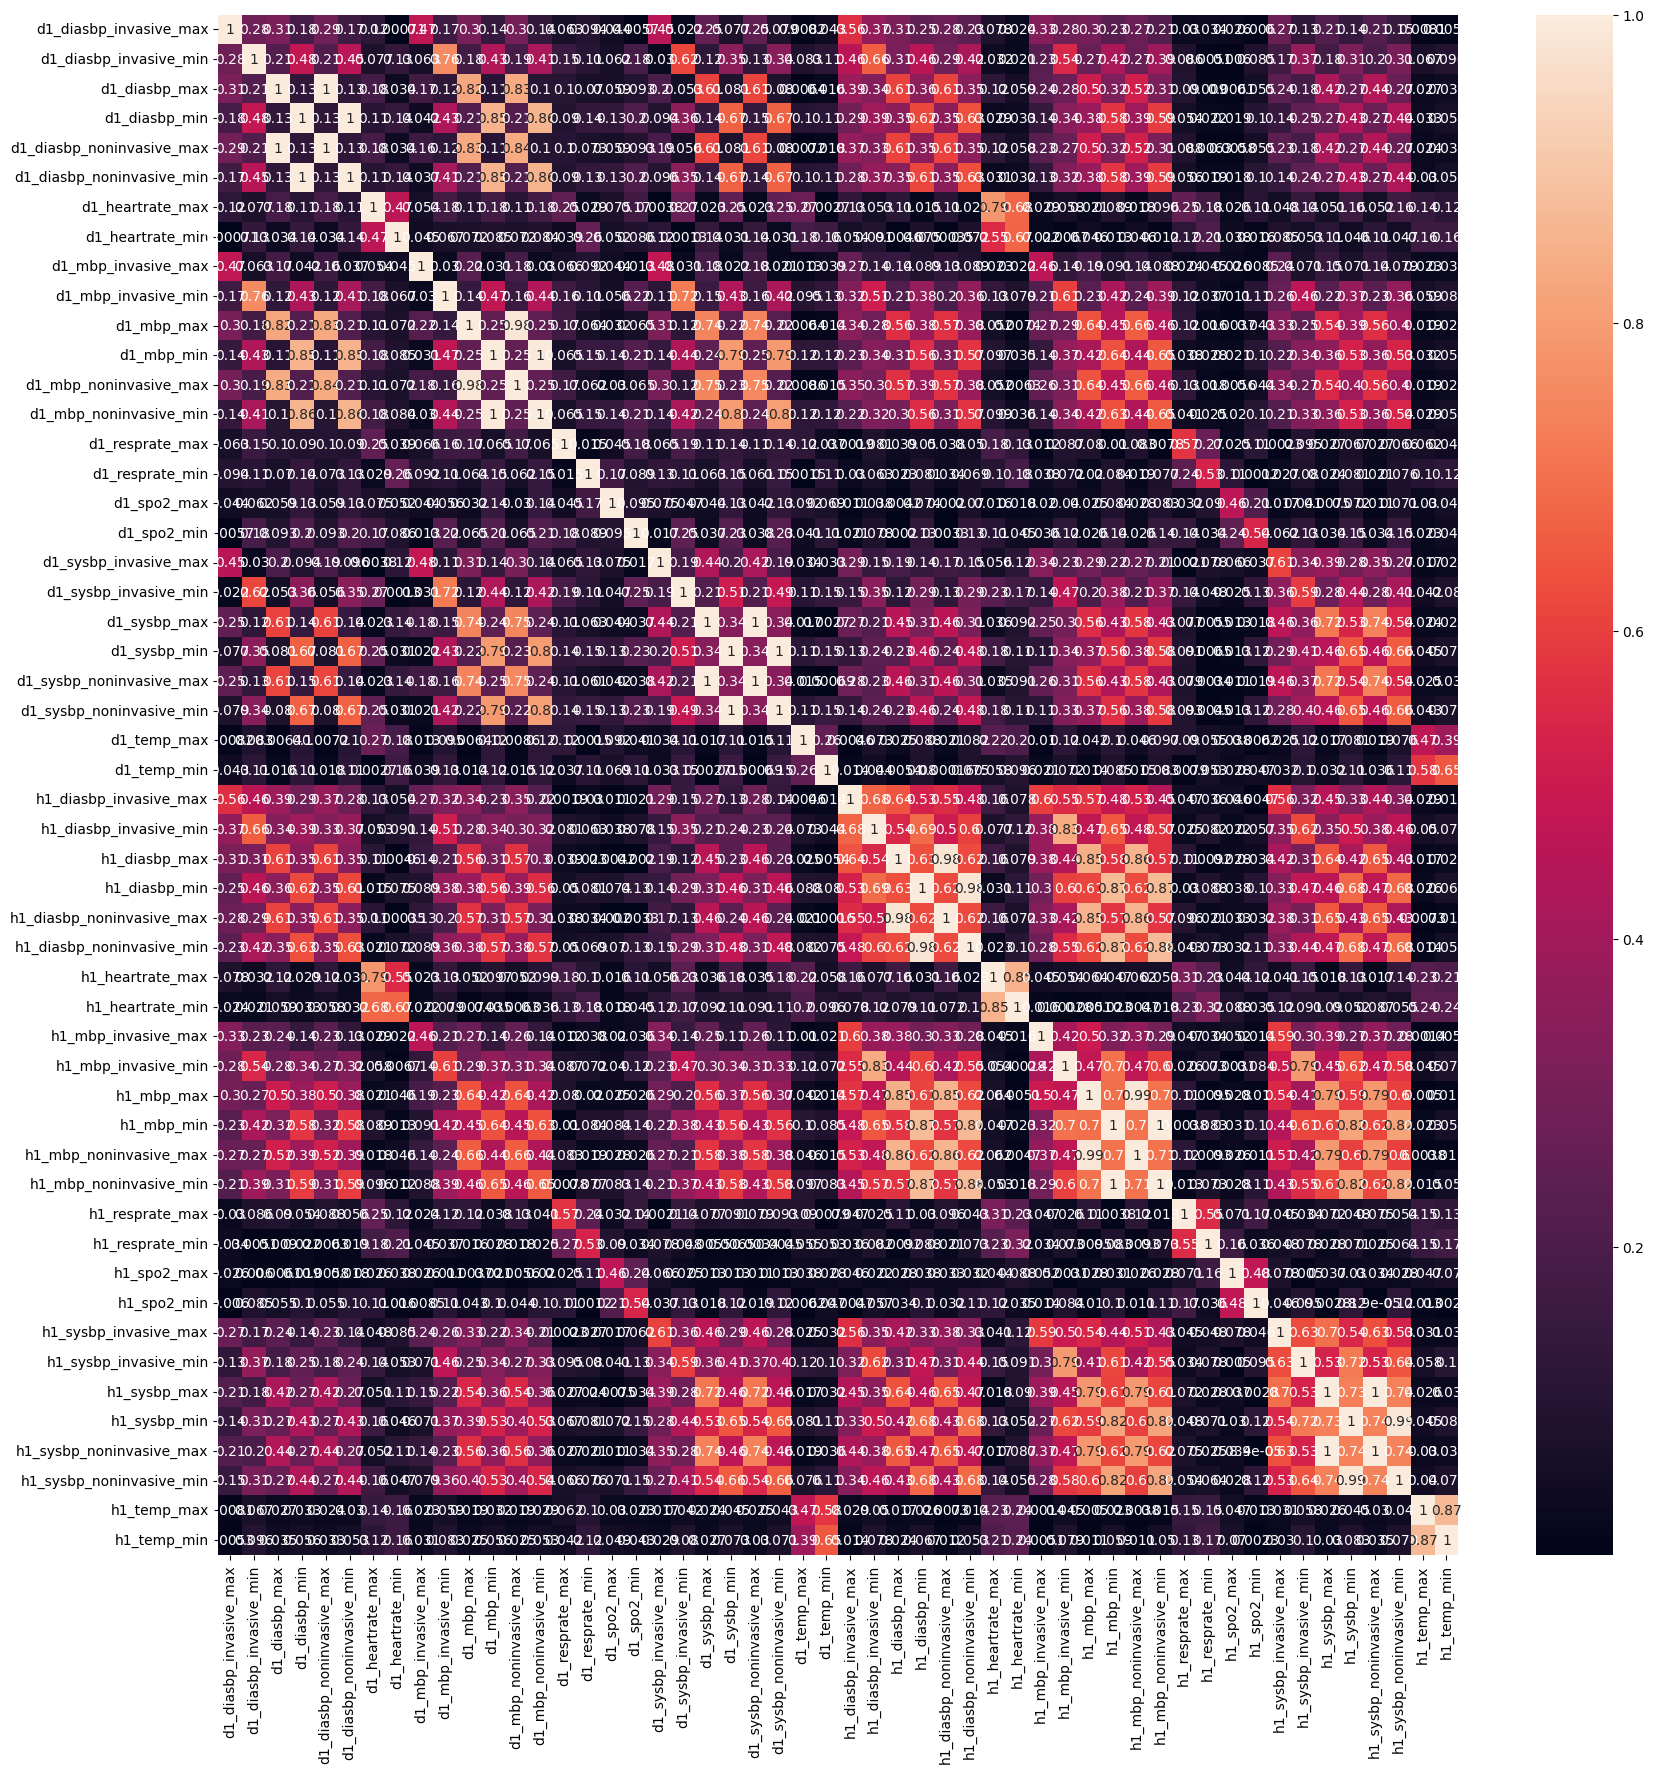

In [ ]:
# Vitals
vitals = category(description,"vitals")
plt.figure(figsize=(20,20))
sns.heatmap(abs(df[vitals["Variable Name"]].corr()),annot=True)
plt.show()

In [ ]:
corr_features_vitals = correlation(df[vitals["Variable Name"]], 0.85)
print(len(set(corr_features_vitals)))
print(corr_features_vitals)

17
{'h1_mbp_max', 'h1_mbp_min', 'd1_sysbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_temp_min', 'h1_diasbp_noninvasive_max', 'h1_heartrate_min', 'h1_sysbp_noninvasive_max', 'd1_diasbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_diasbp_noninvasive_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min'}


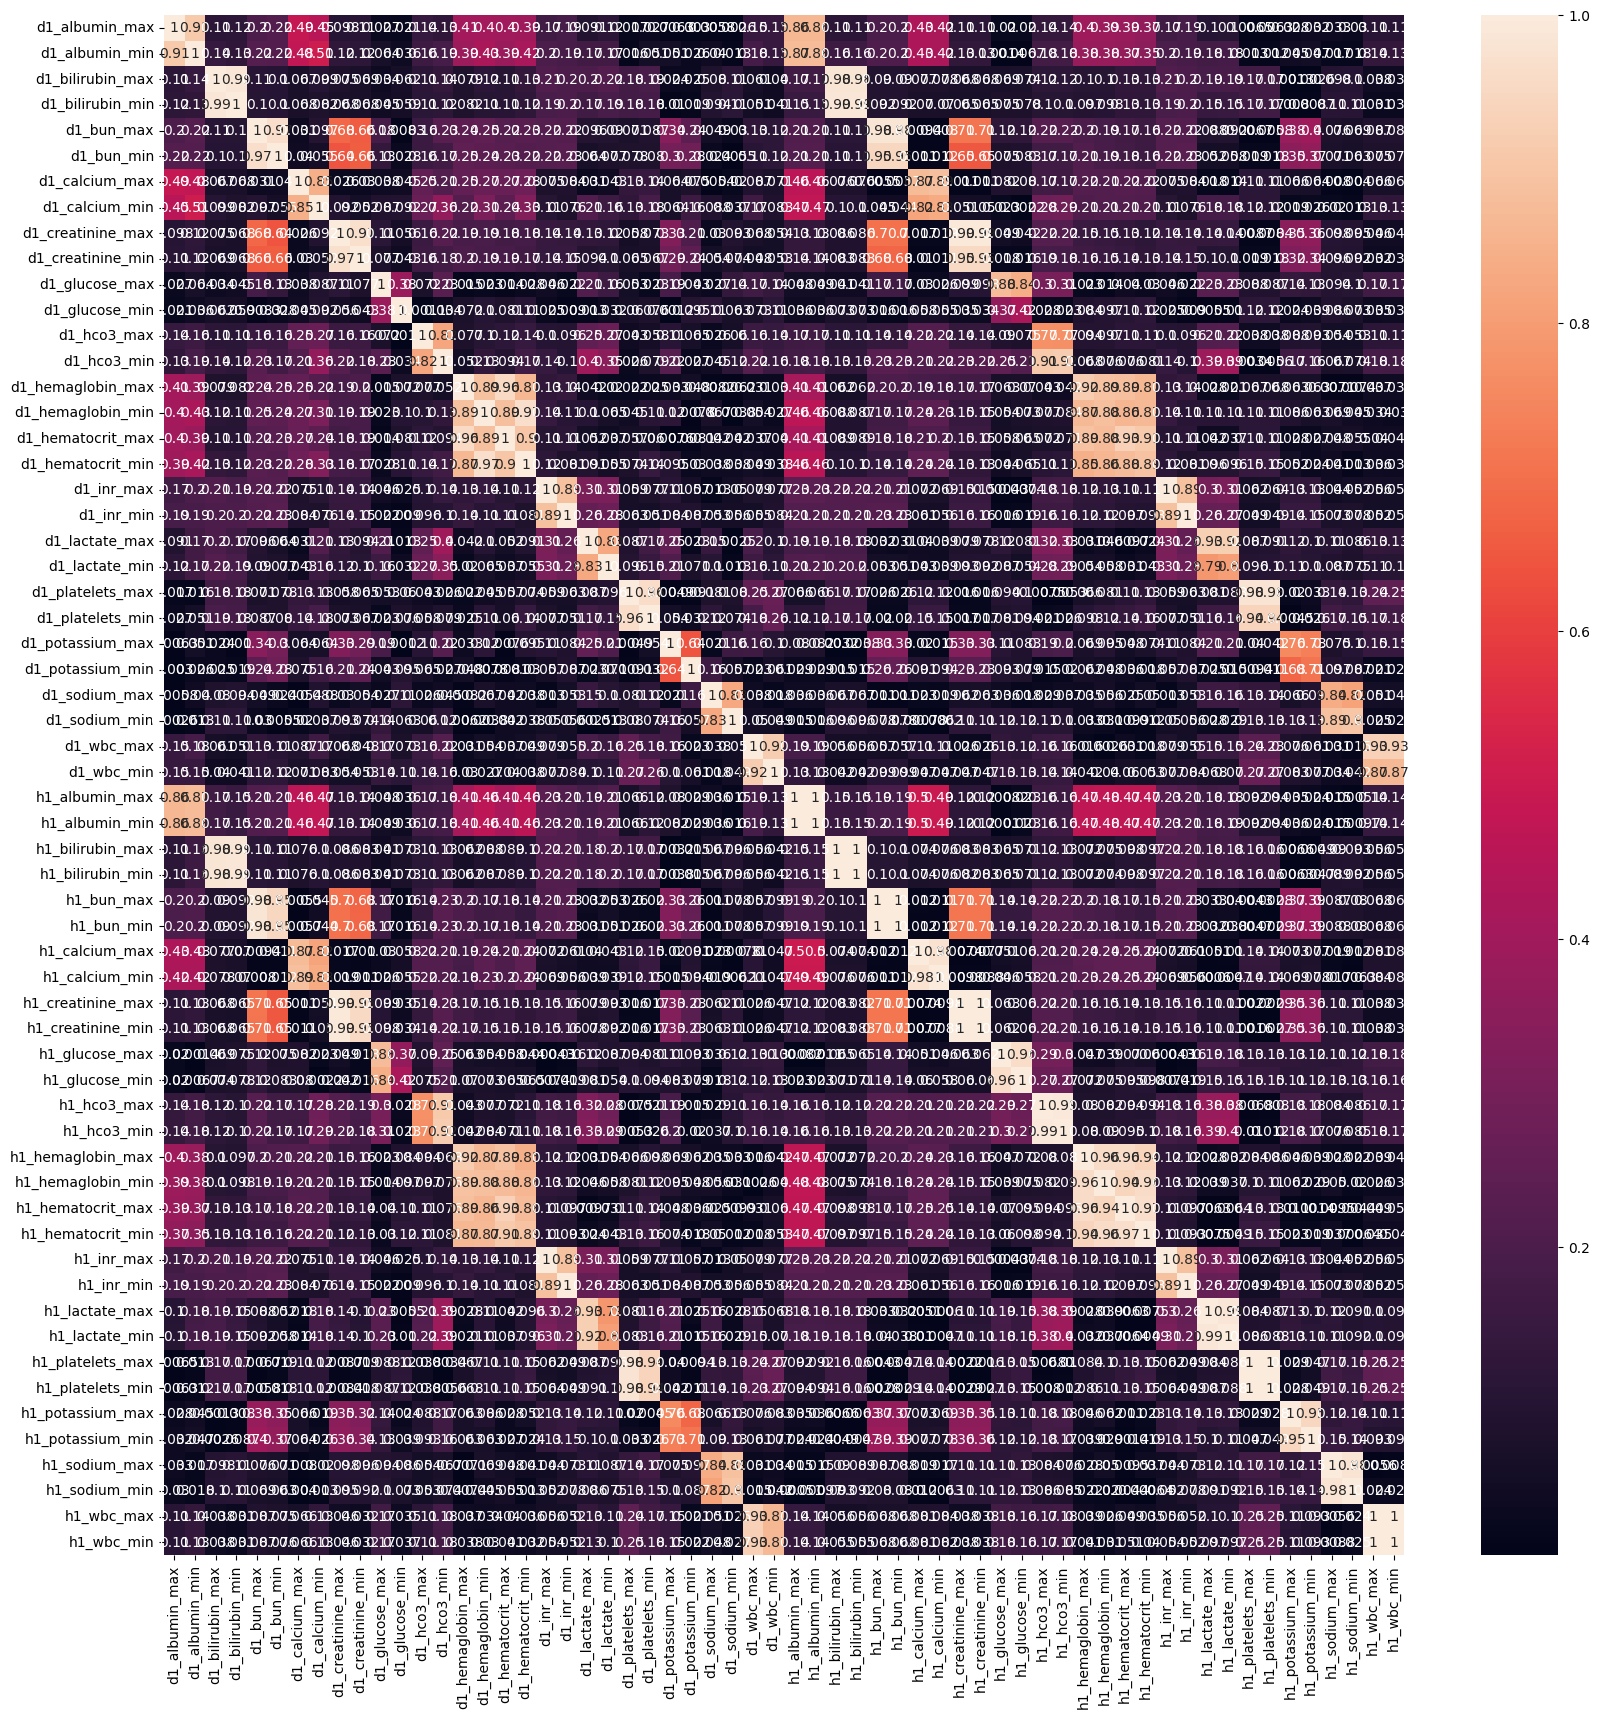

In [ ]:
# Labs
labs = category(description,"labs")
plt.figure(figsize=(20,20))
sns.heatmap(abs(df[labs["Variable Name"]].corr()),annot=True)
plt.show()

In [ ]:
corr_features_labs = correlation(df[labs["Variable Name"]], 0.85)
print(len(set(corr_features_labs)))
print(corr_features_labs)

39
{'d1_bun_min', 'h1_bilirubin_min', 'h1_glucose_min', 'd1_creatinine_min', 'h1_inr_max', 'h1_bilirubin_max', 'd1_bilirubin_min', 'h1_inr_min', 'h1_potassium_min', 'd1_albumin_min', 'h1_sodium_min', 'h1_lactate_min', 'h1_platelets_min', 'h1_creatinine_max', 'h1_albumin_max', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'd1_wbc_min', 'h1_creatinine_min', 'h1_hco3_max', 'h1_wbc_min', 'h1_hematocrit_max', 'h1_calcium_min', 'h1_glucose_max', 'd1_hematocrit_min', 'h1_albumin_min', 'h1_calcium_max', 'h1_bun_max', 'h1_hco3_min', 'h1_hematocrit_min', 'h1_sodium_max', 'd1_inr_min', 'd1_hemaglobin_min', 'h1_wbc_max', 'd1_platelets_min', 'h1_bun_min', 'h1_lactate_max', 'h1_platelets_max', 'd1_hematocrit_max'}


# Data Pre-processing

After extensive data exploration, further pre-processing is done:

In [ ]:
# DROP ALL COLUMNS THAT NEED TO BE DROPPED
to_drop = set()
to_drop.update(['apache_2_bodysystem', 'apache_4a_icu_death_prob', 'encounter_id', 'patient_id', 'weight', 'height',
                'icu_stay_type', 'readmission_status', 'hospital_id', 'icu_id', 'hospital_death',
                'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'])
to_drop.update(corr_features_apache_cov)
to_drop.update(corr_features_vitals)
to_drop.update(corr_features_labs)

In [ ]:
# Number of columns to be dropped
len(to_drop)

70

In [ ]:
data = df.copy().drop(to_drop, axis=1)

In [ ]:
df.shape, data.shape

((91713, 186), (91713, 116))